In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data= pd.read_csv(r"C:\Users\moosa\OneDrive\Desktop\ids\2021.01.09.csv")


In [5]:
data.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,32.00,270,191,786,445.0,4.574045,6,6,6,41013,53136.0,1610156855379279,161015685513884,2108.6345,outlier,0.240439
1,31.50,270,191,786,445.0,4.574045,6,7,6,41013,53411.0,161015685661334,1610156856325685,2108.6345,outlier,0.287655
2,759.00,270,191,786,445.0,4.574045,7,9,6,45899,63242.0,1610156856720623,1610156850700001,2108.6345,malicious,6.020622
3,35.25,270,191,786,445.0,4.574045,6,6,6,41013,53920.0,1610156858948832,161015685868661,2108.6345,outlier,0.262222
4,36.75,270,191,786,445.0,4.574045,6,6,6,41013,54022.0,1610156859404194,1610156859141038,2108.6345,outlier,0.263156


In [6]:
data.isna().sum()

avg_ipt              0
bytes_in             0
bytes_out            0
dest_ip              0
dest_port        12864
entropy              0
num_pkts_out         0
num_pkts_in          0
proto                0
src_ip               0
src_port         12864
time_end             0
time_start           0
total_entropy        0
label                0
duration             0
dtype: int64

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
cols_to_imp = ['dest_port', 'src_port']
data_imputed = data.copy()
data_imputed[cols_to_imp] = imputer.fit_transform(data_imputed[cols_to_imp])
data[cols_to_imp] = data_imputed[cols_to_imp]


In [8]:
data_imputed.isna().sum()

avg_ipt          0
bytes_in         0
bytes_out        0
dest_ip          0
dest_port        0
entropy          0
num_pkts_out     0
num_pkts_in      0
proto            0
src_ip           0
src_port         0
time_end         0
time_start       0
total_entropy    0
label            0
duration         0
dtype: int64

In [10]:
data = data_imputed

In [11]:
data.isna().sum()

avg_ipt          0
bytes_in         0
bytes_out        0
dest_ip          0
dest_port        0
entropy          0
num_pkts_out     0
num_pkts_in      0
proto            0
src_ip           0
src_port         0
time_end         0
time_start       0
total_entropy    0
label            0
duration         0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
encoder.fit(df.label)

encoded_data = encoder.transform(data.label)
data.label = encoded_data

In [13]:
data.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,32.00,270,191,786,445.0,4.574045,6,6,6,41013,53136.0,1610156855379279,161015685513884,2108.6345,2,0.240439
1,31.50,270,191,786,445.0,4.574045,6,7,6,41013,53411.0,161015685661334,1610156856325685,2108.6345,2,0.287655
2,759.00,270,191,786,445.0,4.574045,7,9,6,45899,63242.0,1610156856720623,1610156850700001,2108.6345,1,6.020622
3,35.25,270,191,786,445.0,4.574045,6,6,6,41013,53920.0,1610156858948832,161015685868661,2108.6345,2,0.262222
4,36.75,270,191,786,445.0,4.574045,6,6,6,41013,54022.0,1610156859404194,1610156859141038,2108.6345,2,0.263156


In [14]:
X = data.drop("label", axis = 1)
y = data.label

In [15]:
X.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
0,32.00,270,191,786,445.0,4.574045,6,6,6,41013,53136.0,1610156855379279,161015685513884,2108.6345,0.240439
1,31.50,270,191,786,445.0,4.574045,6,7,6,41013,53411.0,161015685661334,1610156856325685,2108.6345,0.287655
2,759.00,270,191,786,445.0,4.574045,7,9,6,45899,63242.0,1610156856720623,1610156850700001,2108.6345,6.020622
3,35.25,270,191,786,445.0,4.574045,6,6,6,41013,53920.0,1610156858948832,161015685868661,2108.6345,0.262222
4,36.75,270,191,786,445.0,4.574045,6,6,6,41013,54022.0,1610156859404194,1610156859141038,2108.6345,0.263156


In [16]:
# Fit Isolation Forest model
clf = IsolationForest(contamination=0.07, random_state=42)
clf.fit(X)

IsolationForest(contamination=0.07, random_state=42)

In [17]:
# Predict outliers
y_pred = clf.predict(X)

In [18]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
ind=np.where(y_pred > 0)
ind

(array([     0,      1,      2, ..., 470263, 470264, 470265], dtype=int64),)

In [22]:
data.head(470221)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,32.00,270,191,786,445.0,4.574045,6,6,6,41013,53136.0,1610156855379279,161015685513884,2108.634500,2,0.240439
1,31.50,270,191,786,445.0,4.574045,6,7,6,41013,53411.0,161015685661334,1610156856325685,2108.634500,2,0.287655
2,759.00,270,191,786,445.0,4.574045,7,9,6,45899,63242.0,1610156856720623,1610156850700001,2108.634500,1,6.020622
3,35.25,270,191,786,445.0,4.574045,6,6,6,41013,53920.0,1610156858948832,161015685868661,2108.634500,2,0.262222
4,36.75,270,191,786,445.0,4.574045,6,6,6,41013,54022.0,1610156859404194,1610156859141038,2108.634500,2,0.263156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470216,117.75,270,191,786,445.0,4.600684,6,6,6,18403,53078.0,1610236780935406,1610236780020168,2120.915300,1,0.915238
470217,155.00,270,191,786,445.0,4.585724,7,8,6,19332,53899.0,1610236780206567,1610236778196832,2114.018800,2,2.009735
470218,122.00,0,132,786,445.0,0.323657,3,2,6,25019,55574.0,1610236783669111,161023678354664,42.722755,2,0.122471
470219,145.75,270,191,786,445.0,4.600684,6,6,6,18403,52878.0,1610236780367946,1610236779220478,2120.915300,1,1.147468


In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=5, random_state=1)
z = tsne.fit_transform(X)


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 470266 samples in 1.174s...
[t-SNE] Computed neighbors for 470266 samples in 4.894s...
[t-SNE] Computed conditional probabilities for sample 1000 / 470266
[t-SNE] Computed conditional probabilities for sample 2000 / 470266
[t-SNE] Computed conditional probabilities for sample 3000 / 470266
[t-SNE] Computed conditional probabilities for sample 4000 / 470266
[t-SNE] Computed conditional probabilities for sample 5000 / 470266
[t-SNE] Computed conditional probabilities for sample 6000 / 470266
[t-SNE] Computed conditional probabilities for sample 7000 / 470266
[t-SNE] Computed conditional probabilities for sample 8000 / 470266
[t-SNE] Computed conditional probabilities for sample 9000 / 470266
[t-SNE] Computed conditional probabilities for sample 10000 / 470266
[t-SNE] Computed conditional probabilities for sample 11000 / 470266
[t-SNE] Computed conditional probabilities for sample 12000 / 470266
[t-SNE] Computed conditional probabi

[t-SNE] Computed conditional probabilities for sample 124000 / 470266
[t-SNE] Computed conditional probabilities for sample 125000 / 470266
[t-SNE] Computed conditional probabilities for sample 126000 / 470266
[t-SNE] Computed conditional probabilities for sample 127000 / 470266
[t-SNE] Computed conditional probabilities for sample 128000 / 470266
[t-SNE] Computed conditional probabilities for sample 129000 / 470266
[t-SNE] Computed conditional probabilities for sample 130000 / 470266
[t-SNE] Computed conditional probabilities for sample 131000 / 470266
[t-SNE] Computed conditional probabilities for sample 132000 / 470266
[t-SNE] Computed conditional probabilities for sample 133000 / 470266
[t-SNE] Computed conditional probabilities for sample 134000 / 470266
[t-SNE] Computed conditional probabilities for sample 135000 / 470266
[t-SNE] Computed conditional probabilities for sample 136000 / 470266
[t-SNE] Computed conditional probabilities for sample 137000 / 470266
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 246000 / 470266
[t-SNE] Computed conditional probabilities for sample 247000 / 470266
[t-SNE] Computed conditional probabilities for sample 248000 / 470266
[t-SNE] Computed conditional probabilities for sample 249000 / 470266
[t-SNE] Computed conditional probabilities for sample 250000 / 470266
[t-SNE] Computed conditional probabilities for sample 251000 / 470266
[t-SNE] Computed conditional probabilities for sample 252000 / 470266
[t-SNE] Computed conditional probabilities for sample 253000 / 470266
[t-SNE] Computed conditional probabilities for sample 254000 / 470266
[t-SNE] Computed conditional probabilities for sample 255000 / 470266
[t-SNE] Computed conditional probabilities for sample 256000 / 470266
[t-SNE] Computed conditional probabilities for sample 257000 / 470266
[t-SNE] Computed conditional probabilities for sample 258000 / 470266
[t-SNE] Computed conditional probabilities for sample 259000 / 470266
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 366000 / 470266
[t-SNE] Computed conditional probabilities for sample 367000 / 470266
[t-SNE] Computed conditional probabilities for sample 368000 / 470266
[t-SNE] Computed conditional probabilities for sample 369000 / 470266
[t-SNE] Computed conditional probabilities for sample 370000 / 470266
[t-SNE] Computed conditional probabilities for sample 371000 / 470266
[t-SNE] Computed conditional probabilities for sample 372000 / 470266
[t-SNE] Computed conditional probabilities for sample 373000 / 470266
[t-SNE] Computed conditional probabilities for sample 374000 / 470266
[t-SNE] Computed conditional probabilities for sample 375000 / 470266
[t-SNE] Computed conditional probabilities for sample 376000 / 470266
[t-SNE] Computed conditional probabilities for sample 377000 / 470266
[t-SNE] Computed conditional probabilities for sample 378000 / 470266
[t-SNE] Computed conditional probabilities for sample 379000 / 470266
[t-SNE] Computed con

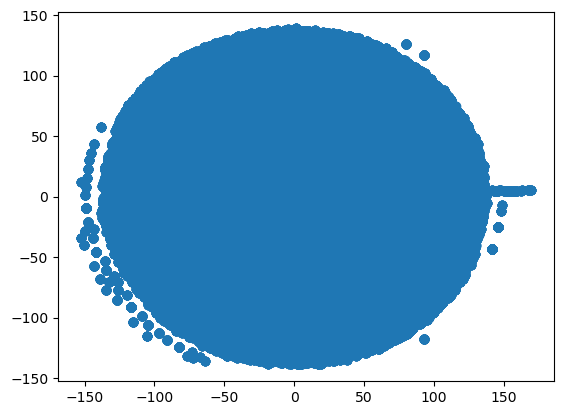

In [36]:
plt.scatter(z[:,0],z[:,1])

Text(0, 0.5, 'WCSS')

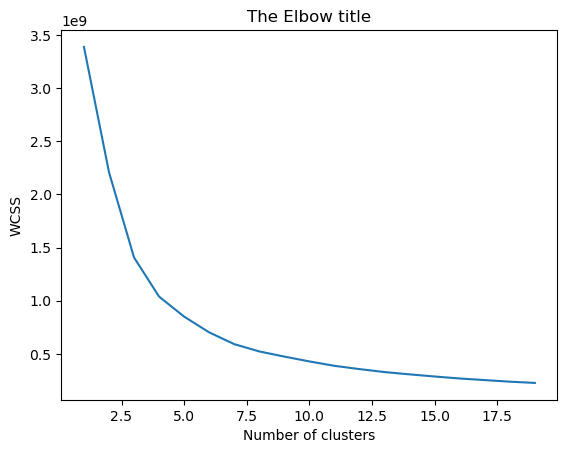

In [35]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20
              ):
  kmeans = KMeans(i)
  kmeans.fit(z)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [53]:
#Clustering with K-mean model -- Training
kmeans = KMeans(11
)
kmeans.fit(z)

KMeans(n_clusters=11)

In [54]:
identified_clusters = kmeans.fit_predict(z)
identified_clusters

array([ 9,  1, 10, ...,  6,  6,  9])

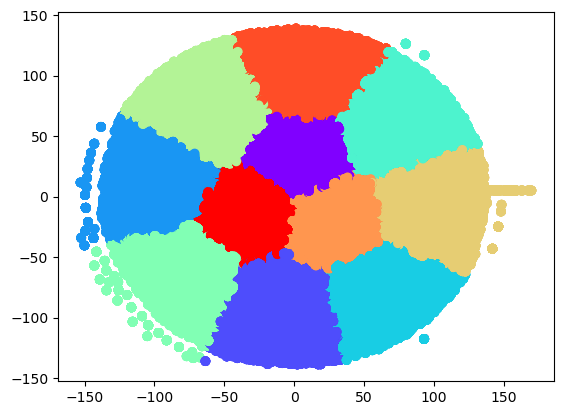

In [55]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(z[:,0],z[:,1], c=data_with_clusters['Clusters'],cmap='rainbow')

In [161]:
from sklearn.svm import OneClassSVM

In [162]:
# Prepare labeled data (1 for normal, -1 for anomalies)
#y_labeled = np.ones(X_with_anomalies.shape[0])
#y_labeled[anomalies_indices] = -1

In [163]:
#'kernel': ['rbf', 'linear'], 'nu': [0.01, 0.05, 0.1, 0.2, 0.4], 'gamma': ['auto', 'scale']
# Fit One-Class SVM model
clf = OneClassSVM(gamma='scale', nu=0.08)
clf.fit(X_with_anomalies)

OneClassSVM(nu=0.08)

In [164]:
# Predict outliers
y_pred = clf.predict(X_with_anomalies)

In [165]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

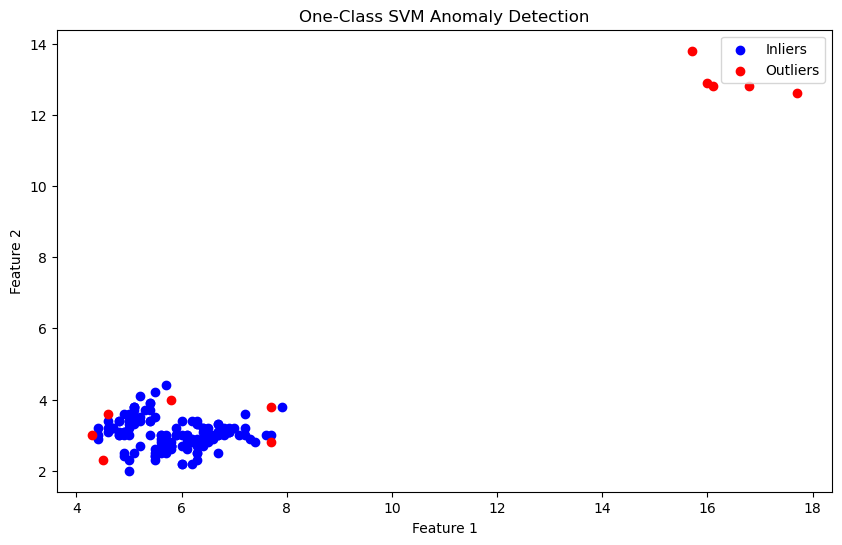

In [166]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_with_anomalies[y_pred == 1][:, 0], X_with_anomalies[y_pred == 1][:, 1], c='blue', label='Inliers')

# Plot outliers
plt.scatter(X_with_anomalies[y_pred == -1][:, 0], X_with_anomalies[y_pred == -1][:, 1], c='red', label='Outliers')

# Plot anomalies
#plt.scatter(X_with_anomalies[anomalies_indices][:, 0], X_with_anomalies[anomalies_indices][:, 1], c='green', label='Anomalies')

plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [167]:
from sklearn.cluster import DBSCAN

In [168]:
# Apply DBSCAN
# parameters min_samples=5
clf = DBSCAN(eps=0.6)
y_pred = clf.fit_predict(X)

In [169]:
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

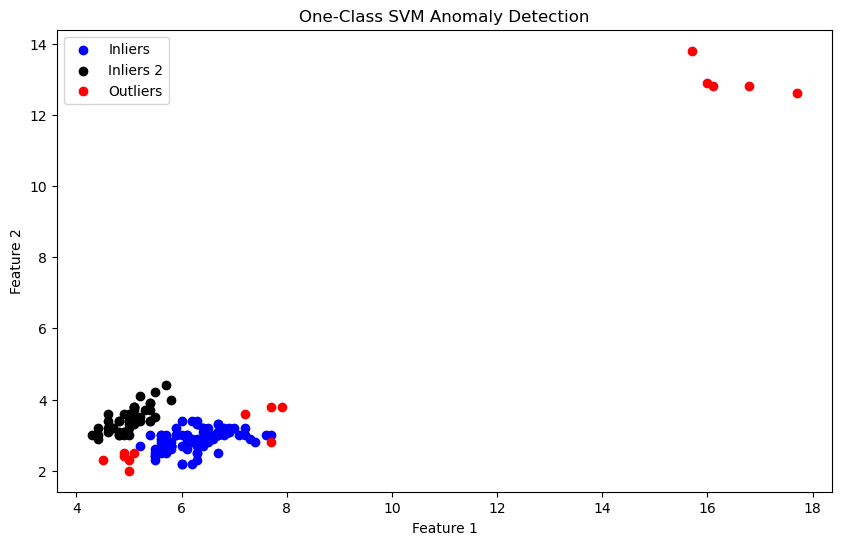

In [171]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_with_anomalies[y_pred == 1][:, 0], X_with_anomalies[y_pred == 1][:, 1], c='blue', label='Inliers')

# Plot inliers
plt.scatter(X_with_anomalies[y_pred == 0][:, 0], X_with_anomalies[y_pred == 0][:, 1], c='black', label='Inliers 2')

# Plot outliers
plt.scatter(X_with_anomalies[y_pred == -1][:, 0], X_with_anomalies[y_pred == -1][:, 1], c='red', label='Outliers')

# Plot anomalies
#plt.scatter(X_with_anomalies[anomalies_indices][:, 0], X_with_anomalies[anomalies_indices][:, 1], c='green', label='Anomalies')

plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [101]:
from sklearn.datasets import make_circles

In [113]:
# Generate a dataset with concentric circles
X, y = make_circles(n_samples=750, noise=0.1, factor=0.3)

In [114]:
X

array([[-0.24772241, -0.42382122],
       [ 0.57247576,  0.88470416],
       [-0.47072753,  0.75227468],
       ...,
       [-0.24486431, -0.08773175],
       [ 0.95502701,  0.51833974],
       [-0.12190545, -0.44852318]])

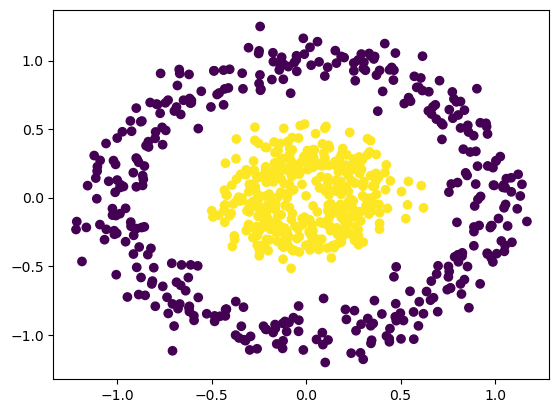

In [115]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [120]:
# Apply DBSCAN
# parameters min_samples=5
dbscan = DBSCAN(eps=0.1)
clusters = dbscan.fit_predict(X)

In [119]:
clusters

array([ 0, 11,  1,  0,  0,  0,  0,  4,  0,  0, -1,  2, 13,  0,  1,  0,  3,
        0,  0,  4,  0,  6,  3,  0,  5, -1,  1, 10,  1,  6, -1,  7,  0,  0,
        8,  9,  0,  0,  1,  0,  0, -1,  5,  0,  0, 13,  0,  0,  2,  0,  0,
        0,  0,  0,  4,  1,  6,  1,  4,  4,  0,  0, 10,  1,  4,  0,  5, -1,
        4,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  4,  0,  1, -1,  3,  0,
        0,  5,  4,  4,  0,  0,  4,  2,  0,  5,  0,  0,  9,  0,  2,  4,  9,
       11,  0,  0,  0, 10,  0,  0,  1,  0,  0,  0,  0, 10,  0,  0, 12,  0,
        0,  0, 10,  0,  1,  1,  0,  9,  0,  0,  4,  5, 10,  9,  4,  2,  0,
        4,  1,  4,  4,  0,  0,  0,  0,  0, -1,  0,  0,  1,  5,  5, -1,  0,
        0,  0,  0,  1,  1,  4,  4,  0,  0, 10,  4,  0,  8,  9,  3,  0,  0,
       10,  6,  0,  4,  1,  0,  0,  3, -1,  0,  0,  9,  0,  9,  1,  1, 10,
        5,  1,  0,  0,  0,  0,  2,  1,  0,  0,  0,  2, 11,  0,  0,  0,  0,
        1,  5,  0, 10,  0, 11,  0,  1,  3,  1,  2,  4,  4,  0,  0,  0,  1,
        4,  4, -1,  1,  0

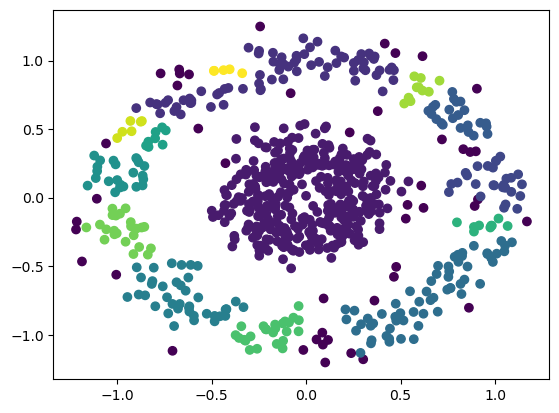

In [121]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()